# Lernkurven

## Digits als Datensatz laden

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y = True)

## Das MLP

In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), activation="relu", solver="adam", max_iter=500, random_state=42)

## Vorbereiten der Lernkurve

In [4]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes = np.linspace(0.1, 1.0, 10)
cross_validations = 5
train_sizes, train_scores, test_scores = learning_curve(mlp, X, y, cv=cross_validations, train_sizes= train_sizes, n_jobs=-1)

In [5]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

### Visualisierung

In [6]:
import matplotlib.pyplot as plt

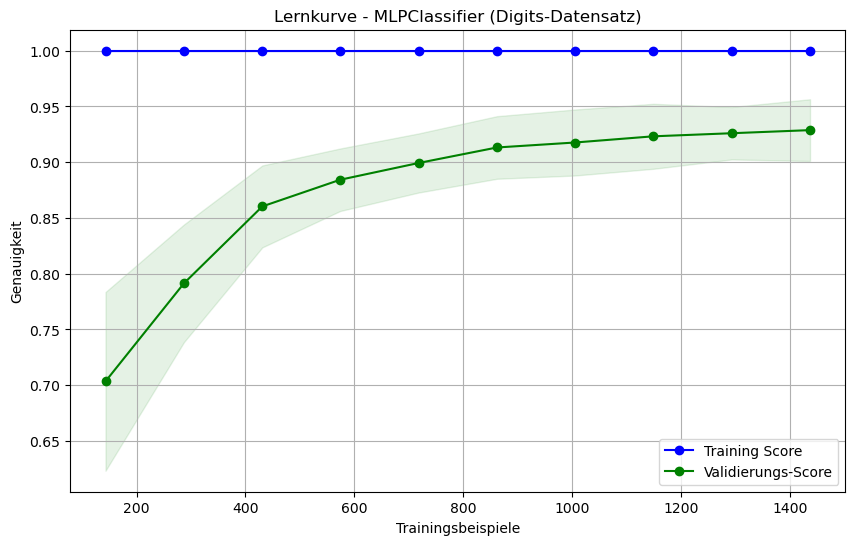

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Score")
plt.plot(train_sizes, test_mean, "o-", color="green", label="Validierungs-Score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.title("Lernkurve - MLPClassifier (Digits-Datensatz)")
plt.xlabel("Trainingsbeispiele")
plt.ylabel("Genauigkeit")
plt.legend(loc="best")
plt.grid(True)
plt.show()

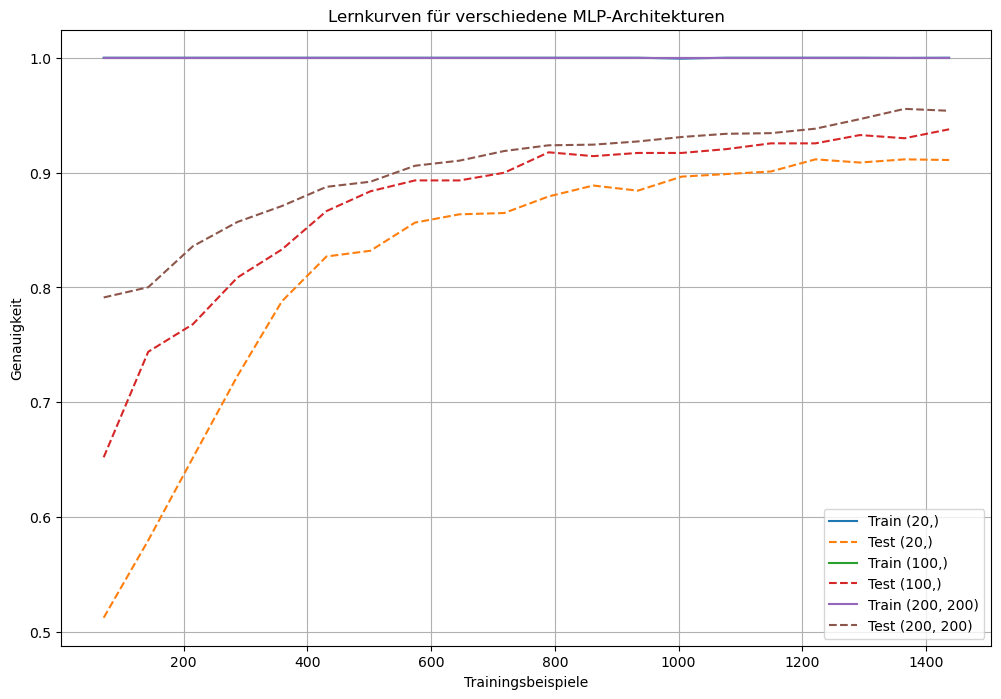

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

X, y = load_digits(return_X_y=True)
hidden_layer_configs = [
    (20,),         # Einfaches Modell
    (100,),        # Mittleres Modell
    (200, 200),    # Komplexes Modell
]

plt.figure(figsize=(12, 8))

for config in hidden_layer_configs:
    mlp = MLPClassifier(hidden_layer_sizes=config, activation="relu", solver="adam", max_iter=2000, random_state=42)
    train_sizes = np.linspace(0.05, 1.0, 20)
    train_sizes, train_scores, test_scores = learning_curve(
        mlp, X, y, cv=5, train_sizes=train_sizes, n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label=f"Train {config}")
    plt.plot(train_sizes, test_mean, label=f"Test {config}", linestyle="--")

plt.title("Lernkurven für verschiedene MLP-Architekturen")
plt.xlabel("Trainingsbeispiele")
plt.ylabel("Genauigkeit")
plt.legend()
plt.grid(True)
plt.show()